In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('lista_de_espera_sisu_2022_1.csv', sep='|', encoding='latin-1')

print(df.columns)



/var/folders/cj/fxsvrm2n5hg9s3svd97hl9bc0000gn/T/ipykernel_806/106827872.py:5: DtypeWarning: Columns (17,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lista_de_espera_sisu_2022_1.csv', sep='|', encoding='latin-1')


Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DATA_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA'],
      dtype='object')


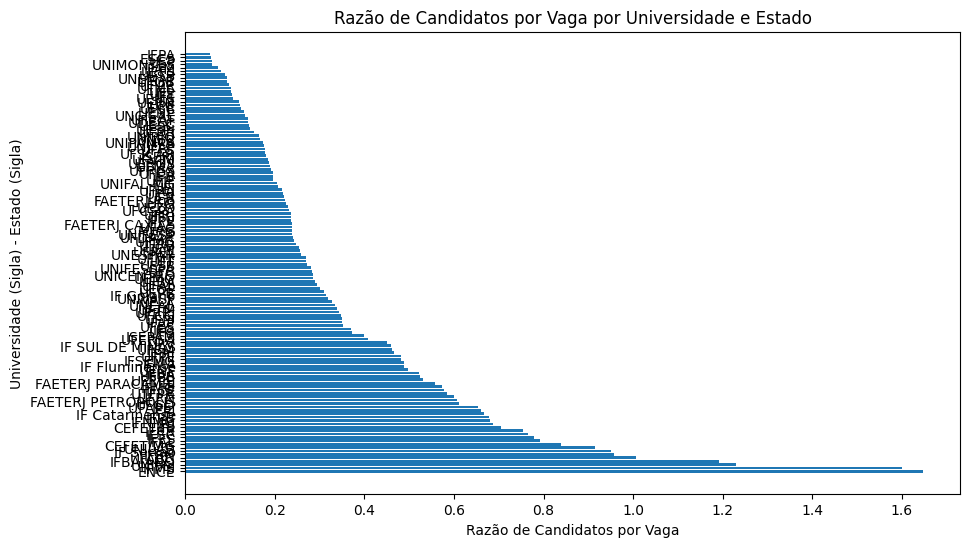

In [48]:
df = df[['SIGLA_IES', 'NOME_IES', 'UF_IES', 'QT_VAGAS_CONCORRENCIA', 'CLASSIFICACAO']]

df_grouped = df.groupby(['SIGLA_IES', 'UF_IES']).agg({'QT_VAGAS_CONCORRENCIA': 'sum', 'CLASSIFICACAO': 'sum'})

df_grouped['Razao_Candidatos_por_Vaga'] = df_grouped['QT_VAGAS_CONCORRENCIA'] / df_grouped['CLASSIFICACAO']

df_grouped.columns = ['Vagas', 'Candidatos', 'Razao_Candidatos_por_Vaga']

df_grouped = df_grouped.sort_values(by='Razao_Candidatos_por_Vaga', ascending=False)

#  gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df_grouped.index.get_level_values('SIGLA_IES'), df_grouped['Razao_Candidatos_por_Vaga'])
plt.xlabel('Razão de Candidatos por Vaga')
plt.ylabel('Universidade (Sigla) - Estado (Sigla)')
plt.title('Razão de Candidatos por Vaga por Universidade e Estado')
plt.show()